### import models

In [1]:
from visionlens.models import InceptionV1

model = InceptionV1().eval()
https://www.kaggle.com/work/collections/14785102
# you can import other models and weights as well

from visionlens.models import resnet50, ResNet50_Weights

### import Hooks and Objectives

In [2]:
from visionlens.objective import Objective, Hook

In [3]:
# create a objective function which takes hooks and returns the loss


def channel_objective(hooks):

    return -hooks("mixed4a")[:, 6, :, :].mean()


obj = Objective(channel_objective, name="mixed4a:6")

### add hooks to the model

In [4]:
## add hook to particular layer only for the objective, you can add hook to whole model too

In [5]:
mixed4a = model.get_submodule("mixed4a")

In [6]:
# now add the hook to mixed4a layer
hooks = Hook(mixed4a)

In [7]:
hooks.module, hooks.features, hooks.hook

(CatLayer(), None, <torch.utils.hooks.RemovableHandle at 0x7060ac4d59c0>)

In [8]:
# for keeping the things same, we will convert this hook to Dict[str, Hook]

hooks_ = lambda x: (
    hooks.features if x == "mixed4a" else None
)  # Now we can call hooks("mixed4a") to get the actual activations

## generate_random_img

In [9]:
from visionlens.images import image

In [10]:
param_func = lambda: image(
    w=244
)  # returns parameters of an image which will be updated and
# callable function which returns the image

In [11]:
from visionlens.optimize import Visualizer

In [12]:
viz = Visualizer(model, obj, hooks_, param_func)

Current Image

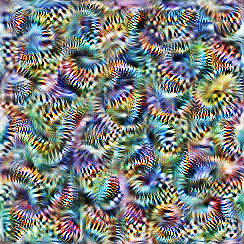

Epoch 90/100 - Loss: -945.02734375


Final Image

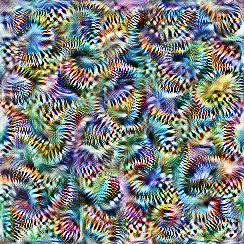

In [13]:
viz.visualize()